<a href="https://colab.research.google.com/github/idddan1122/DS_apps_ratings./blob/main/DS_apps_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

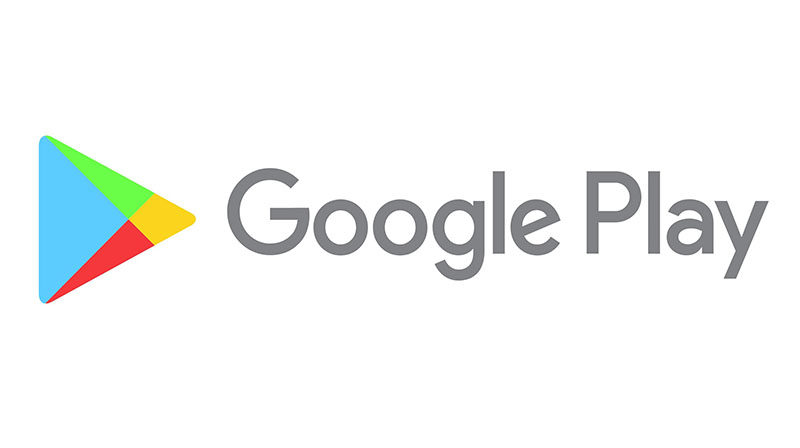

In [ ]:
from IPython.display import Image
Image('googleplay.jpg')

Google Play is a digital distribution service operated and developed by Google. It serves as the official app store for Android operating system and its derivatives as well as Chrome OS, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs.

In this project we are trying to predict the rating that an application will receive according to its features, using a data set from 2018 that contains 9659 rows and 13 features including the target feature "Rating".



## Importing Libraries and the data set

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

data = pd.read_csv('apps_ratings.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,06-Jul-18,1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


## Data manipulating

We decided to focus on the last update year instead of specific date of last update in order to help the model.
In addition we decided to focus on the primary android version required instead of a specific version from the same reason.

In [ ]:
data = data.rename(columns={'Last_Updated': 'Last_Update_Year'})
data.Last_Update_Year = data.Last_Update_Year.str.replace('-',' ')
data.Last_Update_Year = data.Last_Update_Year.str.split(' ').str[2].astype(float)

data = data.rename(columns={'Android_Ver': 'Android_Ver_And_Up'})
data.Android_Ver_And_Up = data.Android_Ver_And_Up.replace('Varies with device',np.NaN)
data.Android_Ver_And_Up = data.Android_Ver_And_Up.str.split('.').str[0].astype(float)

data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Update_Year,Current_Ver,Android_Ver_And_Up
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,18.0,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,18.0,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,18.0,1.2.4,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,18.0,Varies with device,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,18.0,1.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,17.0,1.48,4.0
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,18.0,1,4.0
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,17.0,1,2.0
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,15.0,Varies with device,NaN


## Category graphs


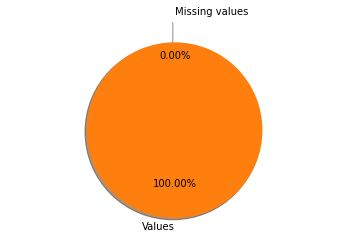

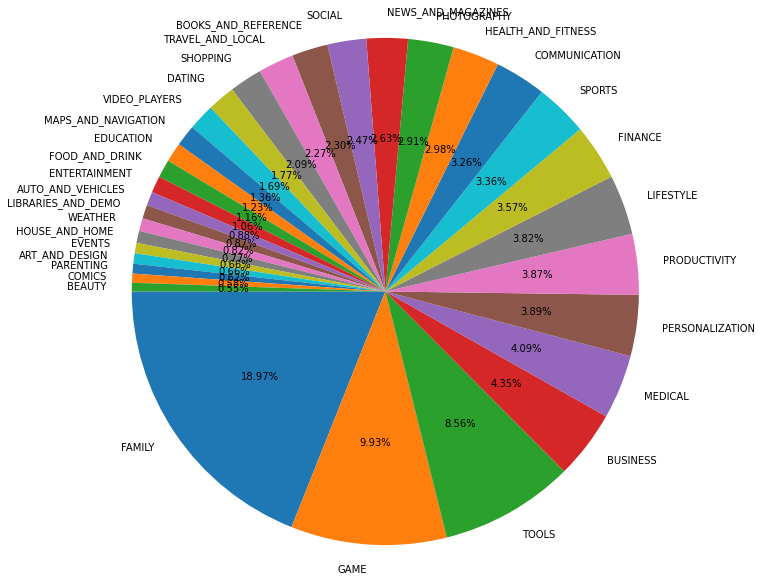

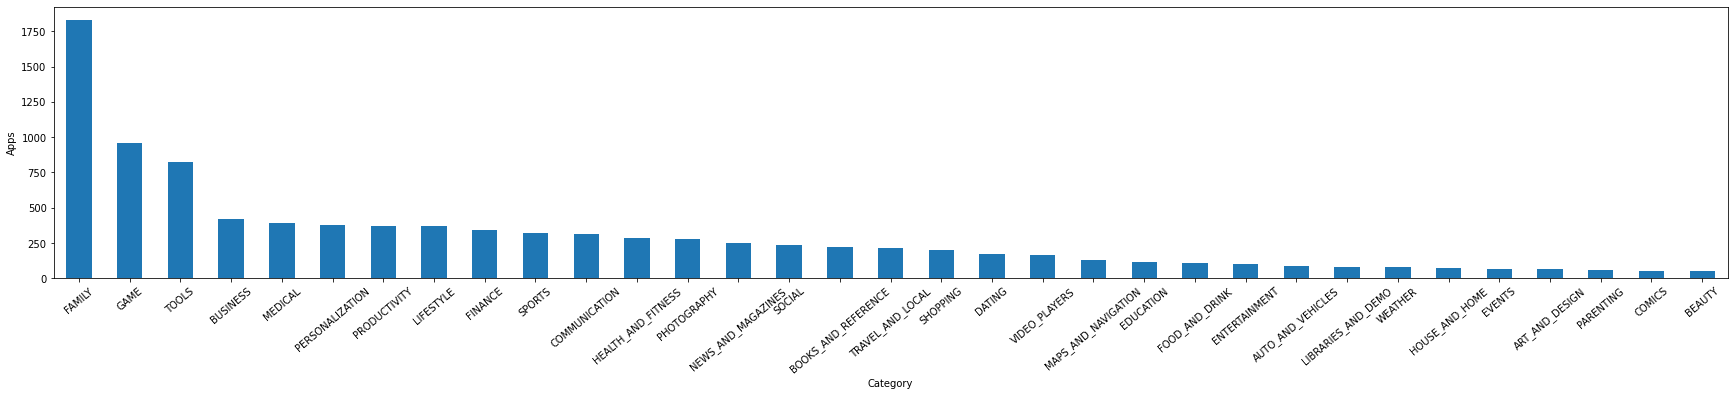

In [ ]:
P_Category = data['Category'].isnull().sum() / len(data['Category'])
labels_Category = 'Missing values', 'Values'
sizes_Category = [P_Category * 100, (1-P_Category) * 100]
explode_Category = (0.25, 0)
fig_Category, ax_Category = plt.subplots()
ax_Category.pie(sizes_Category, explode=explode_Category, labels=labels_Category, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Category.axis('equal')
plt.show()

dic = data['Category'].value_counts()
aladin = np.empty_like(dic).astype(float)
labels_Category = np.empty_like(dic)
for i in range(len(dic)):
  aladin[i] = (dic[i]/dic.sum())*100
labels_Category = dic.keys()
fig_Category, ax_Category = plt.subplots()
ax_Category.pie(aladin, labels=labels_Category,radius=1, autopct='%1.2f%%',
        shadow=False, startangle=180)
ax_Category.axis('equal')
fig_Category.set_size_inches(10, 10)
plt.show()

plt.figure(figsize=(30,5))
data['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Apps')
plt.xticks(rotation=40)
plt.show()


## Content_Rating graphs


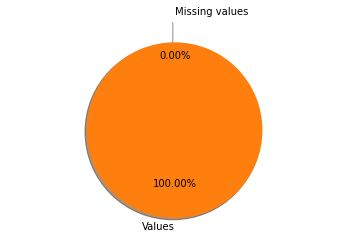

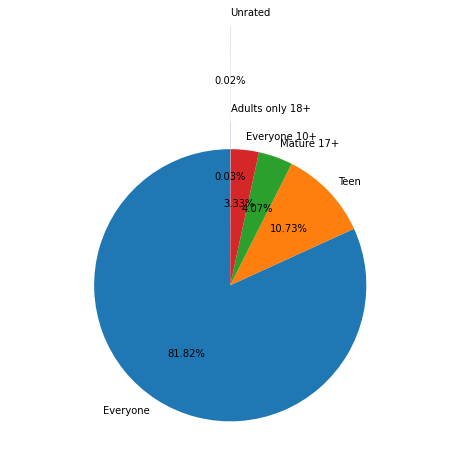

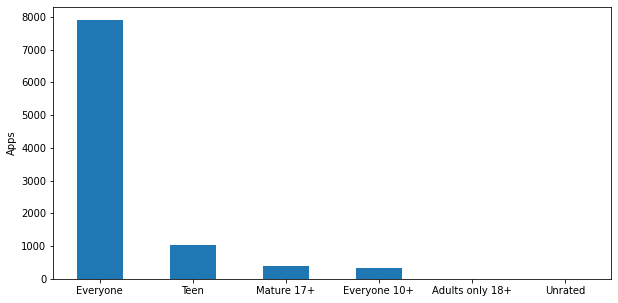

In [ ]:
P_Content_Rating = data['Content_Rating'].isnull().sum() / len(data['Content_Rating'])
labels_Content_Rating = 'Missing values', 'Values'
sizes_Content_Rating = [P_Content_Rating * 100, (1-P_Content_Rating) * 100]
explode_Content_Rating = (0.25, 0)
fig_Content_Rating, ax_Content_Rating = plt.subplots()
ax_Content_Rating.pie(sizes_Content_Rating, explode=explode_Content_Rating, labels=labels_Content_Rating, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Content_Rating.axis('equal')
plt.show()

dic = data['Content_Rating'].value_counts()
aladin = np.empty_like(dic).astype(float)
labels_Content_Rating = np.empty_like(dic)
for i in range(len(dic)):
  aladin[i] = (dic[i]/dic.sum())*100
labels_Content_Rating = dic.keys()
fig_Content_Rating, ax_Content_Rating = plt.subplots()
ax_Content_Rating.pie(aladin, labels=labels_Content_Rating, explode=(0,0,0,0,0.2,0.9), autopct='%1.2f%%',
        shadow=False, startangle=90)
ax_Content_Rating.axis('equal')
fig_Content_Rating.set_size_inches(8, 8)
plt.show()

plt.figure(figsize=(10,5))
data['Content_Rating'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.xlabel('')
plt.ylabel('Apps')
plt.show()


## Rating graphs


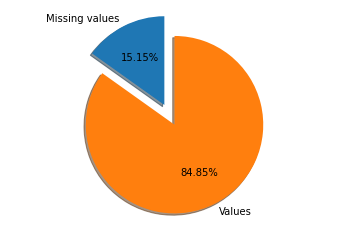

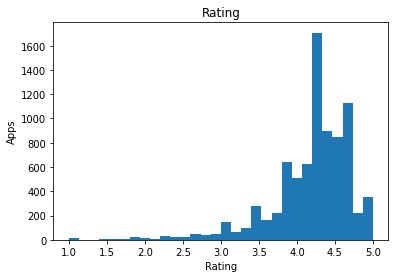

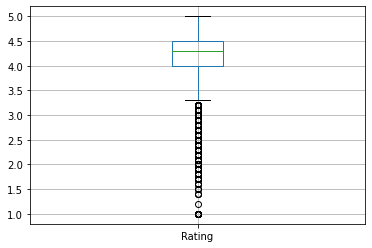

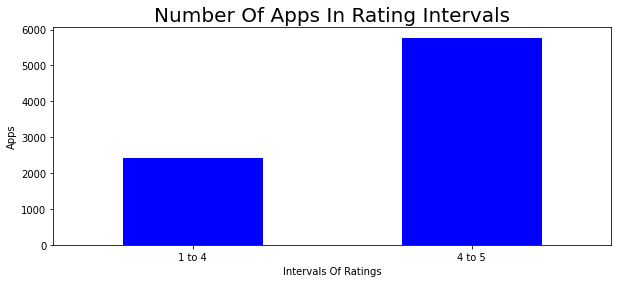

In [ ]:
P_Rating = data['Rating'].isnull().sum() / len(data['Rating'])
labels_Rating = 'Missing values', 'Values'
sizes_Rating = [P_Rating * 100, (1-P_Rating) * 100]
explode_Rating = (0.25, 0)
fig_Rating, ax_Rating = plt.subplots()
ax_Rating.pie(sizes_Rating, explode=explode_Rating, labels=labels_Rating, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Rating.axis('equal')
plt.show()

plt.xlabel('Rating')
plt.ylabel('Apps')
plt.title('Rating')
plt.hist(data['Rating'],bins=(30))
plt.show()

pd.DataFrame(data['Rating']).boxplot()
plt.show()

cuts_Rating = pd.cut(data['Rating'], bins=[1, 4, 5], include_lowest=True,labels=["1 to 4", "4 to 5"])
ax1_Rating = cuts_Rating.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,4))
ax1_Rating.set_xlabel('Intervals Of Ratings')
ax1_Rating.set_ylabel('Apps')
ax1_Rating.set_title("Number Of Apps In Rating Intervals", size = 20)
plt.show()

## Reviews graphs


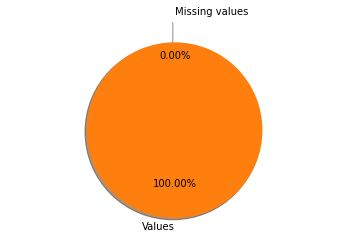

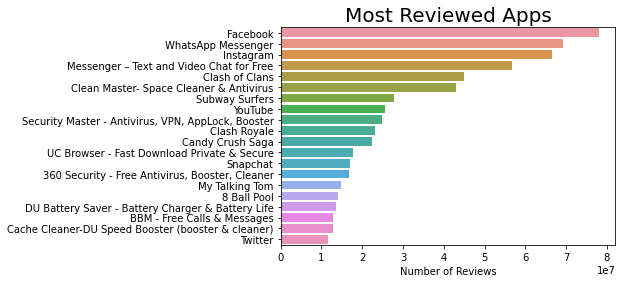

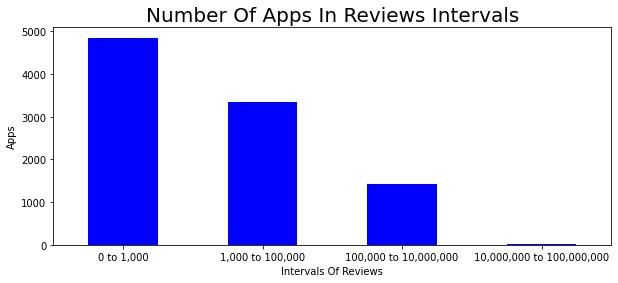

In [ ]:
P_Reviews = data['Reviews'].isnull().sum() / len(data['Reviews'])
labels_Reviews = 'Missing values', 'Values'
sizes_Reviews = [P_Reviews * 100, (1-P_Reviews) * 100]
explode_Reviews = (0.25, 0)
fig_Reviews, ax_Reviews = plt.subplots()
ax_Reviews.pie(sizes_Reviews, explode=explode_Reviews, labels=labels_Reviews, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Reviews.axis('equal')
plt.show()

sort_Reviews = data.sort_values(['Reviews'],ascending = 0 )[:20]
ax_Reviews = sn.barplot(x = 'Reviews' , y = 'App' , data = sort_Reviews)
ax_Reviews.set_xlabel('Number of Reviews')
ax_Reviews.set_ylabel('')
ax_Reviews.set_title("Most Reviewed Apps", size = 20)
plt.show()

cuts_Reviews = pd.cut(data['Reviews'], bins=[0, 1000, 100000, 10000000,100000000], include_lowest=True,labels=["0 to 1,000", "1,000 to 100,000", "100,000 to 10,000,000", "10,000,000 to 100,000,000"])
ax1_Reviews = cuts_Reviews.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,4))
ax1_Reviews.set_xlabel('Intervals Of Reviews')
ax1_Reviews.set_ylabel('Apps')
ax1_Reviews.set_title("Number Of Apps In Reviews Intervals", size = 20)
plt.show()

## Size graphs

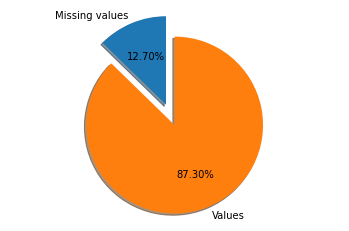

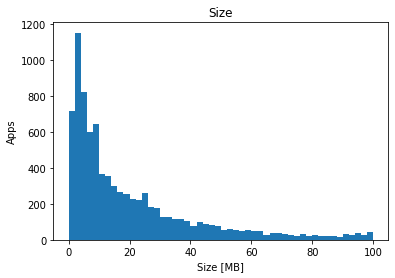

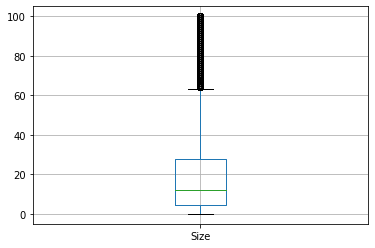

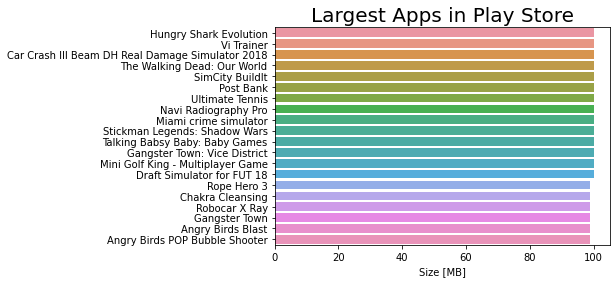

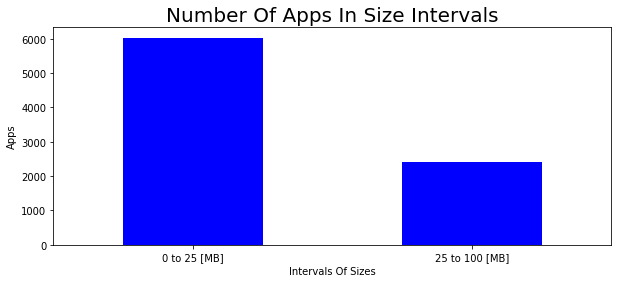

In [ ]:
P_Size = data['Size'].isnull().sum() / len(data['Size'])
labels_Size = 'Missing values', 'Values'
sizes_Size = [P_Size * 100, (1-P_Size) * 100]
explode_Size = (0.25, 0)
fig_Size, ax_Size = plt.subplots()
ax_Size.pie(sizes_Size, explode=explode_Size, labels=labels_Size, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Size.axis('equal')
plt.show()

plt.xlabel('Size [MB]')
plt.ylabel('Apps')
plt.title('Size')
plt.hist(data['Size'],bins=(50))
plt.show()

pd.DataFrame(data['Size']).boxplot()
plt.show()

sort_Size = data.sort_values(['Size'],ascending = 0 )[:20]
ax_Size = sn.barplot(x = 'Size' , y = 'App' , data = sort_Size)
ax_Size.set_xlabel('Size [MB]')
ax_Size.set_ylabel('')
ax_Size.set_title("Largest Apps in Play Store", size = 20)
plt.show()

cuts_Size = pd.cut(data['Size'], bins=[0, 25, 100], include_lowest=True,labels=["0 to 25 [MB]", "25 to 100 [MB]"])
ax1_Size = cuts_Size.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,4))
ax1_Size.set_xlabel('Intervals Of Sizes')
ax1_Size.set_ylabel('Apps')
ax1_Size.set_title("Number Of Apps In Size Intervals", size = 20)
plt.show()

## Price graphs

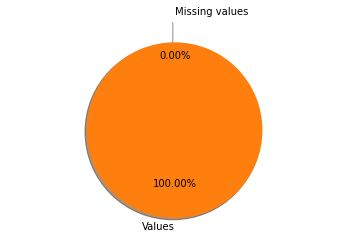

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25105 missing from current font.
  font.set

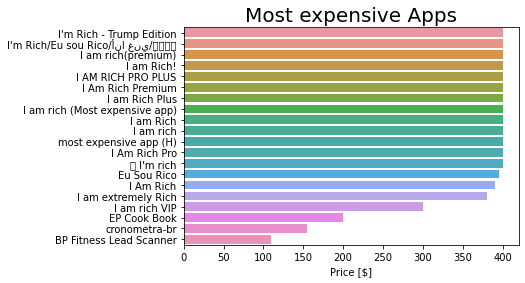

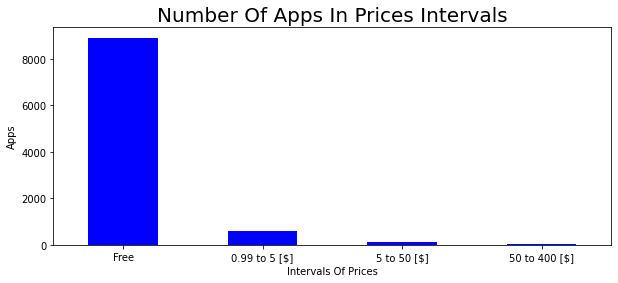

In [ ]:
P_Price = data['Price'].isnull().sum() / len(data['Price'])
labels_Price = 'Missing values', 'Values'
sizes_Price = [P_Price * 100, (1-P_Price) * 100]
explode_Price = (0.25, 0)
fig_Price, ax_Price = plt.subplots()
ax_Price.pie(sizes_Price, explode=explode_Price, labels=labels_Price, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Price.axis('equal')
plt.show()

sort_Price = data.sort_values(['Price'],ascending = 0 )[:20]
ax_Price = sn.barplot(x = 'Price' , y = 'App' , data = sort_Price)
ax_Price.set_xlabel('Price [$]')
ax_Price.set_ylabel('')
ax_Price.set_title("Most expensive Apps", size = 20)
plt.show()

cuts_Price = pd.cut(data['Price'], bins=[0, 0.0001, 5, 50, 400], include_lowest=True,labels=["Free", "0.99 to 5 [$]", "5 to 50 [$]", "50 to 400 [$]"])
ax1_Price = cuts_Price.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,4))
ax1_Price.set_xlabel('Intervals Of Prices')
ax1_Price.set_ylabel('Apps')
ax1_Price.set_title("Number Of Apps In Prices Intervals", size = 20)
plt.show()

## Installs graphs

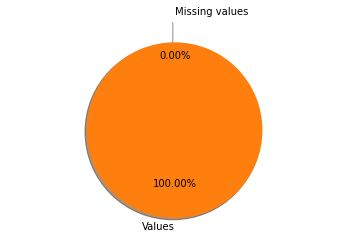

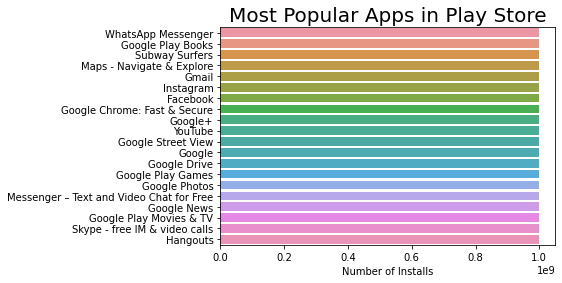

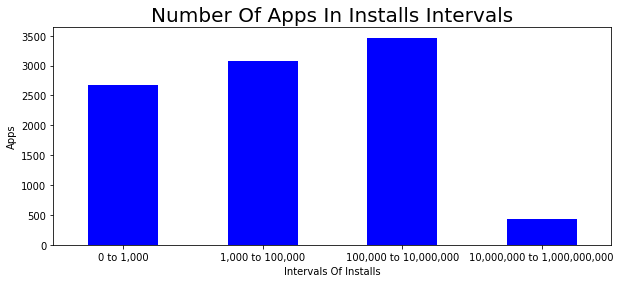

In [ ]:
P_Installs = data['Installs'].isnull().sum() / len(data['Installs'])
labels_Installs = 'Missing values', 'Values'
sizes_Installs = [P_Installs * 100, (1-P_Installs) * 100]
explode_Installs = (0.25, 0)
fig_Installs, ax_Installs = plt.subplots()
ax_Installs.pie(sizes_Installs, explode=explode_Installs, labels=labels_Installs, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Installs.axis('equal')
plt.show()

sort_Installs = data.sort_values(['Installs'],ascending = 0 )[:20]
ax_Installs = sn.barplot(x = 'Installs' , y = 'App' , data = sort_Installs)
ax_Installs.set_xlabel('Number of Installs')
ax_Installs.set_ylabel('')
ax_Installs.set_title("Most Popular Apps in Play Store", size = 20)
plt.show()

cuts_Installs = pd.cut(data['Installs'], bins=[0, 1000, 100000, 10000000,1000000000], include_lowest=True,labels=["0 to 1,000", "1,000 to 100,000", "100,000 to 10,000,000", "10,000,000 to 1,000,000,000"])
ax1_Installs = cuts_Installs.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,4))
ax1_Installs.set_xlabel('Intervals Of Installs')
ax1_Installs.set_ylabel('Apps')
ax1_Installs.set_title("Number Of Apps In Installs Intervals", size = 20)
plt.show()

## Type graphs

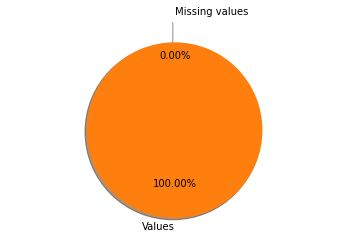

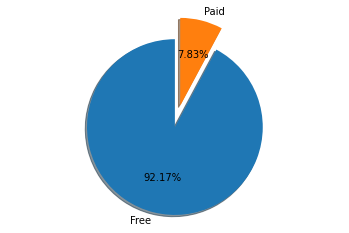

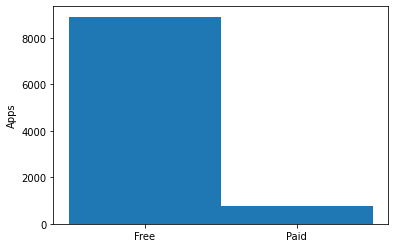

In [ ]:
P_Type = data['Type'].isnull().sum() / len(data['Type'])
labels_Type = 'Missing values', 'Values'
sizes_Type = [P_Type * 100, (1-P_Type) * 100]
explode_Type = (0.25, 0)
fig_Type, ax_Type = plt.subplots()
ax_Type.pie(sizes_Type, explode=explode_Type, labels=labels_Type, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Type.axis('equal')
plt.show()

TypeDic = data['Type'].value_counts().to_dict()
Free_Type = TypeDic['Free'] / (TypeDic['Free']+TypeDic['Paid'])
labels_Type_2 = 'Free', 'Paid'
sizes_Type_2 = [Free_Type * 100, (1-Free_Type) * 100]
explode_Type_2 = (0.25, 0)
fig_Type_2, ax_Type_2 = plt.subplots()
ax_Type_2.pie(sizes_Type_2, explode=explode_Type_2, labels=labels_Type_2, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Type_2.axis('equal')
plt.show()

plt.xlabel('')
plt.ylabel('Apps')
plt.title('')
plt.hist(data['Type'],bins=np.arange(3)-0.5)
plt.show()

## Last_Update_Year graphs


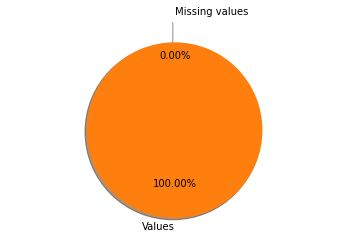

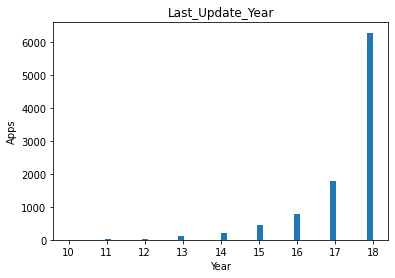

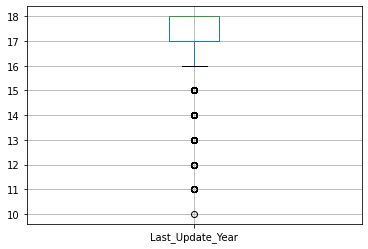

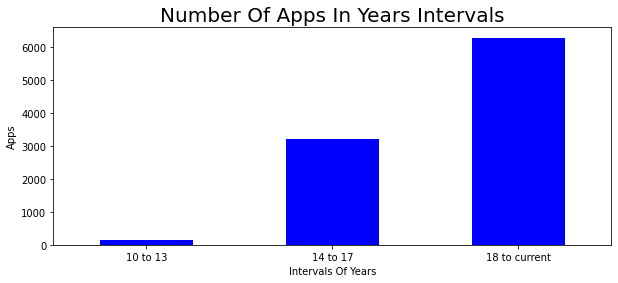

In [ ]:
P_Last_Update_Year = data['Last_Update_Year'].isnull().sum() / len(data['Last_Update_Year'])
labels_Last_Update_Year = 'Missing values', 'Values'
sizes_Last_Update_Year = [P_Last_Update_Year * 100, (1-P_Last_Update_Year) * 100]
explode_Last_Update_Year = (0.25, 0)
fig_Last_Update_Year, ax_Last_Update_Year = plt.subplots()
ax_Last_Update_Year.pie(sizes_Last_Update_Year, explode=explode_Last_Update_Year, labels=labels_Last_Update_Year, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Last_Update_Year.axis('equal')
plt.show()

plt.xlabel('Year')
plt.ylabel('Apps')
plt.title('Last_Update_Year')
plt.hist(data['Last_Update_Year'],bins=(50))
plt.show()

pd.DataFrame(data['Last_Update_Year']).boxplot()
plt.show()

cuts_Last_Update_Year = pd.cut(data['Last_Update_Year'], bins=[10, 13, 17, 18], include_lowest=True,labels=["10 to 13", "14 to 17", "18 to current"])
ax1_Last_Update_Year = cuts_Last_Update_Year.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,4))
ax1_Last_Update_Year.set_xlabel('Intervals Of Years')
ax1_Last_Update_Year.set_ylabel('Apps')
ax1_Last_Update_Year.set_title("Number Of Apps In Years Intervals", size = 20)
plt.show()

## Android_Ver_And_Up graphs

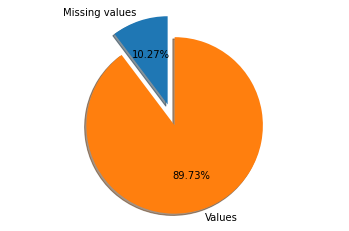

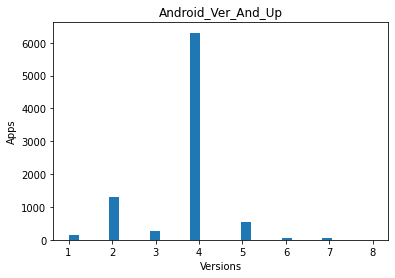

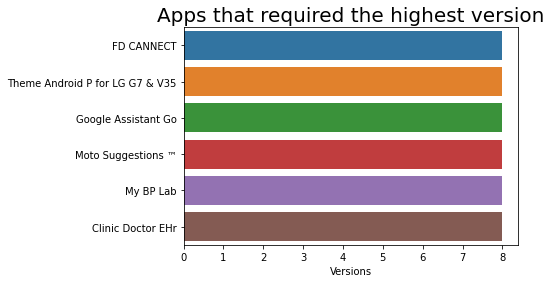

In [ ]:
P_Android_Ver_And_Up = data['Android_Ver_And_Up'].isnull().sum() / len(data['Android_Ver_And_Up'])
labels_Android_Ver_And_Up = 'Missing values', 'Values'
sizes_Android_Ver_And_Up = [P_Android_Ver_And_Up * 100, (1-P_Android_Ver_And_Up) * 100]
explode_Android_Ver_And_Up = (0.25, 0)
fig_Android_Ver_And_Up, ax_Android_Ver_And_Up = plt.subplots()
ax_Android_Ver_And_Up.pie(sizes_Android_Ver_And_Up, explode=explode_Android_Ver_And_Up, labels=labels_Android_Ver_And_Up, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Android_Ver_And_Up.axis('equal')
plt.show()

plt.xlabel('Versions')
plt.ylabel('Apps')
plt.title('Android_Ver_And_Up')
plt.hist(data['Android_Ver_And_Up'],bins=(30))
plt.show()

sort_Android_Ver_And_Up = data.sort_values(['Android_Ver_And_Up'],ascending = 0 )[:6]
ax_Android_Ver_And_Up = sn.barplot(x = 'Android_Ver_And_Up' , y = 'App' , data = sort_Android_Ver_And_Up)
ax_Android_Ver_And_Up.set_xlabel('Versions')
ax_Android_Ver_And_Up.set_ylabel('Apps')
ax_Android_Ver_And_Up.set_ylabel('')
ax_Android_Ver_And_Up.set_title("Apps that required the highest version", size = 20)
plt.show()

## Data cleaning


We decided to delete the rows that contain NaN values for "Rating" because that is our target feature. On the other hand "Genres" we dropped because we already have similiar feature (Category), and "App" we dropped because it has too many different values that can train the model in ineffective way, Lastly we dropped "Current_Ver" because we discovered that it has too many incorrect values.       
For "size" and "Android_Ver_And_Up" we filled missing values with the median value.


In [ ]:
data = data.drop(columns=['App','Genres','Current_Ver'])
data = data.dropna(axis=0, how='any', subset=['Rating'])
data.Size = data.Size.fillna(data.Size.median())
data.Android_Ver_And_Up = data.Android_Ver_And_Up.fillna(data.Android_Ver_And_Up.median())

data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Update_Year,Android_Ver_And_Up
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,18.0,4.0
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,18.0,4.0
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,18.0,4.0
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,18.0,4.0
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,18.0,4.0
...,...,...,...,...,...,...,...,...,...,...
9652,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,17.0,4.0
9654,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,17.0,4.0
9655,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,18.0,4.0
9657,BOOKS_AND_REFERENCE,4.5,114,13.0,1000,Free,0.0,Mature 17+,15.0,4.0


## Converting non-numeric to numeric


In [ ]:
le_Category = preprocessing.LabelEncoder()
data.Category = le_Category.fit_transform(data.Category)
keys_Category = le_Category.classes_
values_Category = le_Category.transform(le_Category.classes_)
dictionary_Category = dict(zip(keys_Category, values_Category))
print(dictionary_Category)

le_Type = preprocessing.LabelEncoder()
data.Type = le_Type.fit_transform(data.Type)
keys_Type = le_Type.classes_
values_Type = le_Type.transform(le_Type.classes_)
dictionary_Type = dict(zip(keys_Type, values_Type))
print(dictionary_Type)

le_Content_Rating	 = preprocessing.LabelEncoder()
data.Content_Rating = le_Content_Rating.fit_transform(data.Content_Rating)
keys_Content_Rating = le_Content_Rating.classes_
values_Content_Rating = le_Content_Rating.transform(le_Content_Rating.classes_)
dictionary_Content_Rating = dict(zip(keys_Content_Rating, values_Content_Rating))
print(dictionary_Content_Rating)

{'ART_AND_DESIGN': 0, 'AUTO_AND_VEHICLES': 1, 'BEAUTY': 2, 'BOOKS_AND_REFERENCE': 3, 'BUSINESS': 4, 'COMICS': 5, 'COMMUNICATION': 6, 'DATING': 7, 'EDUCATION': 8, 'ENTERTAINMENT': 9, 'EVENTS': 10, 'FAMILY': 11, 'FINANCE': 12, 'FOOD_AND_DRINK': 13, 'GAME': 14, 'HEALTH_AND_FITNESS': 15, 'HOUSE_AND_HOME': 16, 'LIBRARIES_AND_DEMO': 17, 'LIFESTYLE': 18, 'MAPS_AND_NAVIGATION': 19, 'MEDICAL': 20, 'NEWS_AND_MAGAZINES': 21, 'PARENTING': 22, 'PERSONALIZATION': 23, 'PHOTOGRAPHY': 24, 'PRODUCTIVITY': 25, 'SHOPPING': 26, 'SOCIAL': 27, 'SPORTS': 28, 'TOOLS': 29, 'TRAVEL_AND_LOCAL': 30, 'VIDEO_PLAYERS': 31, 'WEATHER': 32}
{'Free': 0, 'Paid': 1}
{'Adults only 18+': 0, 'Everyone': 1, 'Everyone 10+': 2, 'Mature 17+': 3, 'Teen': 4, 'Unrated': 5}


## Correlation Matrix


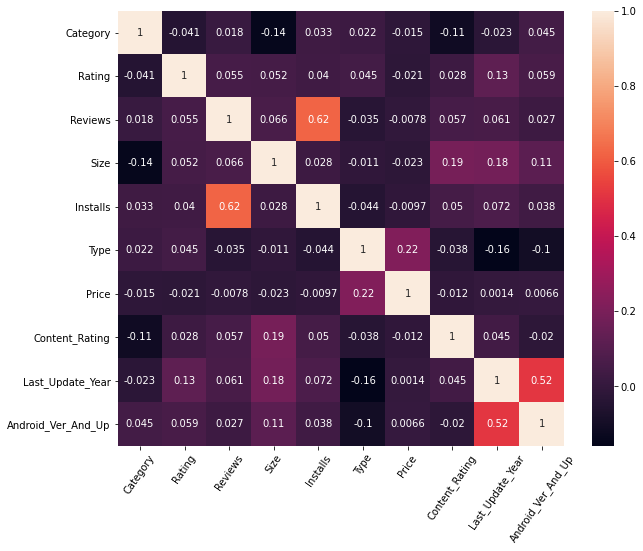

In [ ]:
fig_Corr, ax_Corr = plt.subplots()
ax_Corr = data.corr()
sn.heatmap(ax_Corr, annot=True)
plt.xticks(rotation=55)
fig_Corr.set_size_inches(10, 8)
plt.show()

## Splitting the data into train set and test set


In [ ]:
X, y = data.drop('Rating', axis=1), data.Rating
train_test_ratio = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_ratio, random_state=2, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6147, 9), (6147,), (2049, 9), (2049,))

## Normalizing the data


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline model


In [ ]:
stupid_model = DummyRegressor(strategy="median")
stupid_model.fit(X_train, y_train)
y_pred_ST_train = stupid_model.predict(X_train)
y_pred_ST_test = stupid_model.predict(X_test)
print('train MAE: {}'.format(mean_absolute_error(y_train, y_pred_ST_train)))
print('test MAE: {}'.format(mean_absolute_error(y_test, y_pred_ST_test)))


train MAE: 0.37070115503497647
test MAE: 0.3632015617374329


## Linear Regression model


In [ ]:
LR_Regressor = LinearRegression()
LR_Regressor.fit(X_train, y_train)
y_pred_LR_train = LR_Regressor.predict(X_train)
y_pred_LR_test = LR_Regressor.predict(X_test)
print('train MAE: {}'.format(mean_absolute_error(y_train, y_pred_LR_train)))
print('test MAE: {}'.format(mean_absolute_error(y_test, y_pred_LR_test)))
p = 0
for i in range(len(y_pred_LR_test)):
  if y_pred_LR_test[i] > 5 or y_pred_LR_test[i] < 1:
    p = p + 1 
print('number of incorrect values (>5) or (<1): {}'.format(p))

train MAE: 0.3751627886396892
test MAE: 0.36965968741268784
number of incorrect values (>5) or (<1): 2


We decided not to use this model because we discovered that there were incorrect values in the predicted set.

## Decision Tree Regressor + Ada Boost Regressor models

In [ ]:
for i in range(2,9,3):
  DT_Regressor = DecisionTreeRegressor(max_depth=i, random_state=2)
  DT_Regressor.fit(X_train, y_train)
  y_pred_DT_train = DT_Regressor.predict(X_train)
  y_pred_DT_test = DT_Regressor.predict(X_test)
  AB_Regressor = AdaBoostRegressor(base_estimator=DT_Regressor, n_estimators=100)
  AB_Regressor.fit(X_train, y_train)
  y_pred_AB_train = AB_Regressor.predict(X_train)
  y_pred_AB_test = AB_Regressor.predict(X_test)
  print('train MAE for Decision Tree with max_depth =',i,': {}'.format(mean_absolute_error(y_train, y_pred_DT_train)))
  print('test MAE for Decision Tree with max_depth =',i,': {}\n'.format(mean_absolute_error(y_test, y_pred_DT_test)))
  print('train MAE for Ada Boost max_depth =',i,': {}'.format(mean_absolute_error(y_train, y_pred_AB_train)))
  print('test MAE for Ada Boost max_depth =',i,': {}\n'.format(mean_absolute_error(y_test, y_pred_AB_test)))

train MAE for Decision Tree with max_depth = 2 : 0.3682422752628282
test MAE for Decision Tree with max_depth = 2 : 0.3600116605886678

train MAE for Ada Boost max_depth = 2 : 0.3950593812381872
test MAE for Ada Boost max_depth = 2 : 0.38634511022096435

train MAE for Decision Tree with max_depth = 5 : 0.35222579148106103
test MAE for Decision Tree with max_depth = 5 : 0.35300549168977646

train MAE for Ada Boost max_depth = 5 : 0.45106620506532835
test MAE for Ada Boost max_depth = 5 : 0.44979205148374496

train MAE for Decision Tree with max_depth = 8 : 0.32331240333135436
test MAE for Decision Tree with max_depth = 8 : 0.35816096086566457

train MAE for Ada Boost max_depth = 8 : 0.4209664087022014
test MAE for Ada Boost max_depth = 8 : 0.45803948375490355



## KNN Regressor model


In [ ]:
for i in range(2,9,3):
  KN_Regressor = KNeighborsRegressor(n_neighbors=i)
  KN_Regressor.fit(X_train, y_train)
  y_pred_KN_train = KN_Regressor.predict(X_train)
  y_pred_KN_test = KN_Regressor.predict(X_test)
  print('train MAE for n_neighbors =',i,': {}'.format(mean_absolute_error(y_train, y_pred_KN_train)))
  print('test MAE for n_neighbors =',i,': {}\n'.format(mean_absolute_error(y_test, y_pred_KN_test)))

train MAE for n_neighbors = 2 : 0.2463722140881731
test MAE for n_neighbors = 2 : 0.4228160078086872

train MAE for n_neighbors = 5 : 0.3246754514397267
test MAE for n_neighbors = 5 : 0.38298682284040997

train MAE for n_neighbors = 8 : 0.3411054172767204
test MAE for n_neighbors = 8 : 0.3777757442654954



## Random Forest Regressor model

In [ ]:
for i in range(2,9,3):
  RF_Regressor = RandomForestRegressor(max_depth=i,n_estimators=100)
  RF_Regressor.fit(X_train, y_train)
  y_pred_RF_train = RF_Regressor.predict(X_train)
  y_pred_RF_test = RF_Regressor.predict(X_test)
  print('train MAE for max_depth =',i,': {}'.format(mean_absolute_error(y_train, y_pred_RF_train)))
  print('test MAE for max_depth =',i,': {}\n'.format(mean_absolute_error(y_test, y_pred_RF_test)))

train MAE for max_depth = 2 : 0.3672583712294551
test MAE for max_depth = 2 : 0.35819137758671205

train MAE for max_depth = 5 : 0.34606430409766503
test MAE for max_depth = 5 : 0.34411808537396543

train MAE for max_depth = 8 : 0.3141412601857279
test MAE for max_depth = 8 : 0.33540338109893464



## Lasso Regressor


In [ ]:
for i in range(2,9,3):
  LS_Regressor = linear_model.Lasso(alpha=(i/10))
  LS_Regressor.fit(X_train, y_train)
  y_pred_LS_train = LS_Regressor.predict(X_train)
  y_pred_LS_test = LS_Regressor.predict(X_test)
  print('train MAE for alpha =',i/10,': {}'.format(mean_absolute_error(y_train, y_pred_LS_train)))
  print('test MAE for alpha =',i/10,': {}\n'.format(mean_absolute_error(y_test, y_pred_LS_test)))

train MAE for alpha = 0.2 : 0.3822237792934401
test MAE for alpha = 0.2 : 0.37466679956653093

train MAE for alpha = 0.5 : 0.382852423222449
test MAE for alpha = 0.5 : 0.3755448516193161

train MAE for alpha = 0.8 : 0.3828976854885957
test MAE for alpha = 0.8 : 0.3756219448982747



After analysing the results of the models we concluded that Random Forest Regressor with max depth of 8 was the best model with test MAE of 0.335, and in the second place was Decision Tree Regressor with max depth of 5 and with test MAE of 0.353.

## Feature Importance


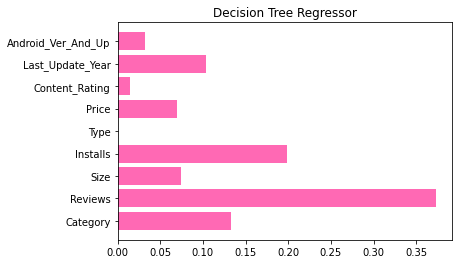

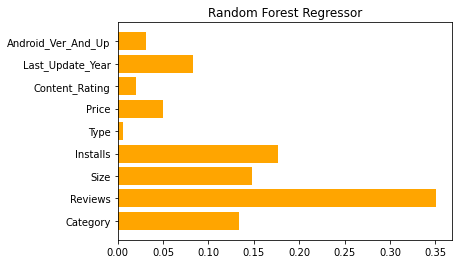

In [ ]:
names = ['Category','Reviews','Size','Installs','Type','Price','Content_Rating','Last_Update_Year','Android_Ver_And_Up']

plt.barh(names, DT_Regressor.feature_importances_,color='hotpink')
plt.title('Decision Tree Regressor')
plt.show()
plt.barh(names, RF_Regressor.feature_importances_,color='orange')
plt.title('Random Forest Regressor')
plt.show()


## Hyper Parameters Tuning for Random Forest Regressor


In [ ]:
overfit = 100
best = 100
abba = 100
best_param_est = 100
overfit_param_depth = 0
best_param_depth = 0
sabba = 0
overfir_param_est = 0

for i in range(2,50,3):
  for j in range(75,125,5):
    RF_Regressor = RandomForestRegressor(max_depth=i,n_estimators=j)
    RF_Regressor.fit(X_train, y_train)
    y_pred_RF_train = RF_Regressor.predict(X_train)
    y_pred_RF_test = RF_Regressor.predict(X_test)
    score_train = mean_absolute_error(y_train, y_pred_RF_train)
    score_test = mean_absolute_error(y_test, y_pred_RF_test)
    o_f = abs(score_test-score_train)                            
    if score_test < best:
      best = score_test
      best_param_depth = i
      best_param_est = j
      abba = abs(score_test-score_train)
    if o_f < overfit:
      overfit = o_f
      overfit_param_depth = i
      overfir_param_est = j
      sabba = score_test
print('the best test MAE is',best,'with max depth of',best_param_depth,'for',best_param_est,'estimators and difference between test MAE and train MAE of:',abba)
print('The smallest difference between test MAE and train MAE is',overfit,'with max depth of',overfit_param_depth,'for',overfir_param_est,'estimators and test MAE of:',sabba)



the best test MAE is 0.33151695868887215 with max depth of 11 for 105 estimators and difference between test MAE and train MAE of: 0.06290065015056473
The smallest difference between test MAE and train MAE is 0.0026284374093172302 with max depth of 5 for 75 estimators and test MAE of: 0.3437332019137594


## Performance as a function of data set size


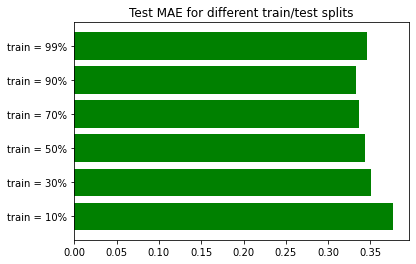

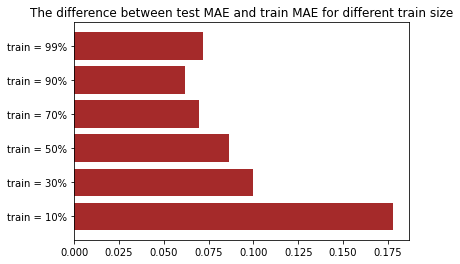

In [ ]:
X, y = data.drop('Rating', axis=1), data.Rating
results_test = np.zeros(6)
results_overfit = np.zeros(6)
results_train = np.zeros(6) 

for k in range(6):
  if k == 5:
      X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=99/100, random_state=2, shuffle=True)
  else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(10+(20*k))/100, random_state=2, shuffle=True)
  RF_Regressor = RandomForestRegressor(max_depth=11,n_estimators=105)
  RF_Regressor.fit(X_train, y_train)
  y_pred_RF_train = RF_Regressor.predict(X_train)
  y_pred_RF_test = RF_Regressor.predict(X_test)
  results_test[k] = mean_absolute_error(y_test, y_pred_RF_test)
  results_train[k] = mean_absolute_error(y_train, y_pred_RF_train)
  results_overfit[k] = abs(results_test[k]-results_train[k])

names = ['train = 10%','train = 30%','train = 50%','train = 70%','train = 90%','train = 99%']
plt.barh(names,results_test,color='green')
plt.title('Test MAE for different train/test splits')
plt.show()
plt.barh(names,results_overfit,color='brown')
plt.title('The difference between test MAE and train MAE for different train size')
plt.show()


## Conclusions:

The best model was Random Forest Regressor with max depth of 11 and 105 estimators, while splitting the data into train set of 90% and test set of 10%.